![alt text](https://matplotlib.org/_static/logo2_compressed.svg)

# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера.

Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно).

Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки:

* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.
*  `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`


Вспомогательные функции:

*    `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
*    `plt.show()` — показать график.
*    `plt.subplot(...)` — добавить подграфик
*    `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
*    `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
*    `plt.title(name)` — установить имя графика
*    `plt.xlabel(name)` — установить название горизонтальной оси
*    `plt.ylabel(name)` — установить название вертикальной оси
*    `plt.legend(loc=...)` — сделать легенду в позиции loc
*    `plt.grid()` — добавить сетку на график
*    `plt.savefig(filename)` — сохранить график в файл


http://matplotlib.org/gallery.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой


In [2]:
import numpy.random as npr

from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

Посмотрим, что можно делать с библиотекой

## Основы matplotlib

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

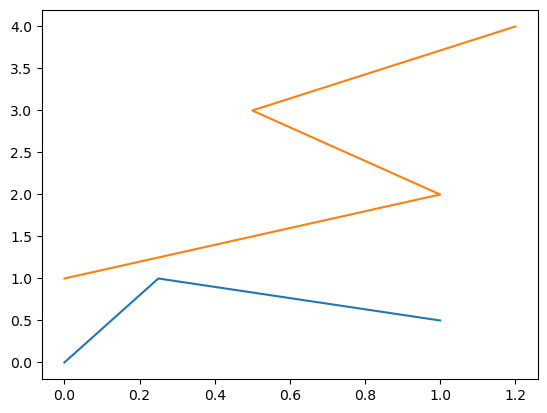

In [5]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

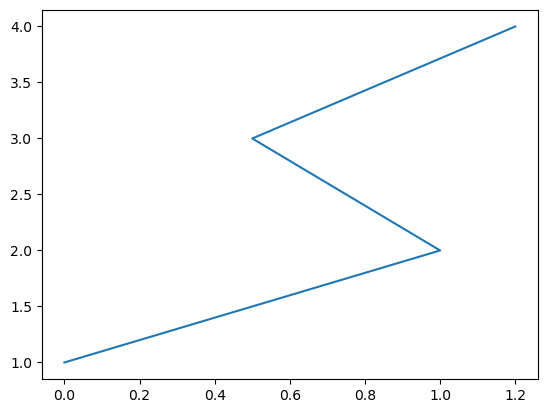

In [6]:
plt.figure()
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

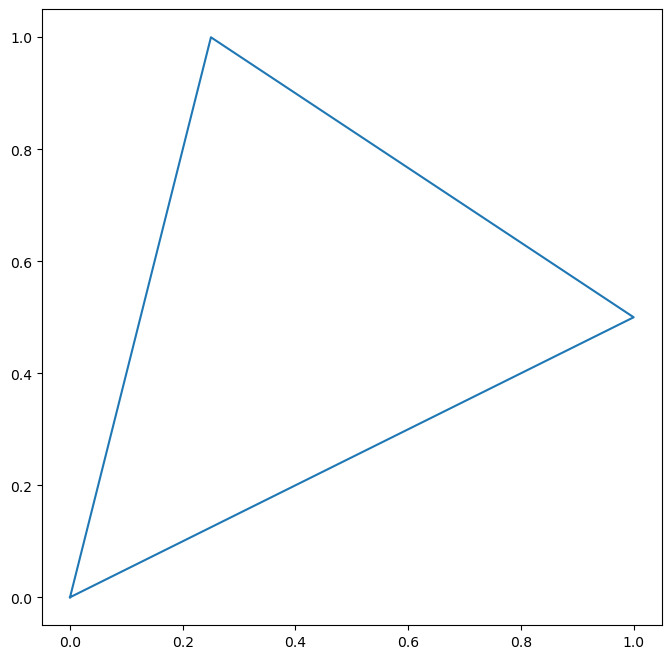

In [7]:
# можно задавать размер изображения
plt.figure(figsize=(8,8))
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

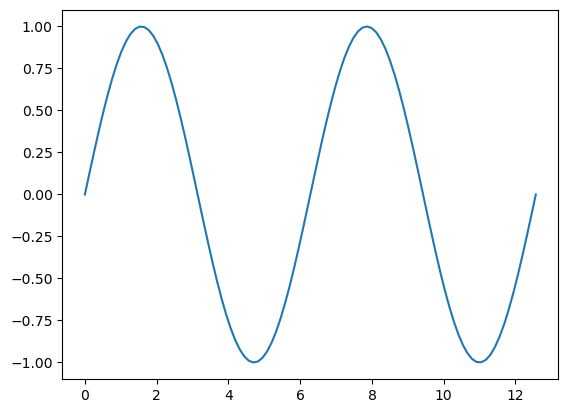

In [8]:
# тут мы создаем массив numpy встроенной функцией
# используем функцию из numpy, которая создает массив из 100 точек в диапазоне от 0 до 4 Pi с равными шагами
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

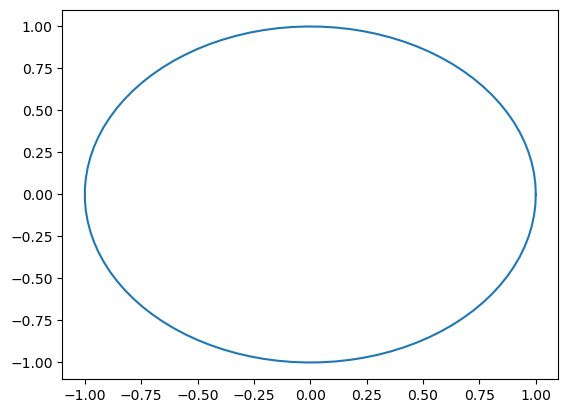

In [11]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
# поэлементно приминяем функции к сгенерированному массиву данных
plt.plot(np.cos(t), np.sin(t))
# plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

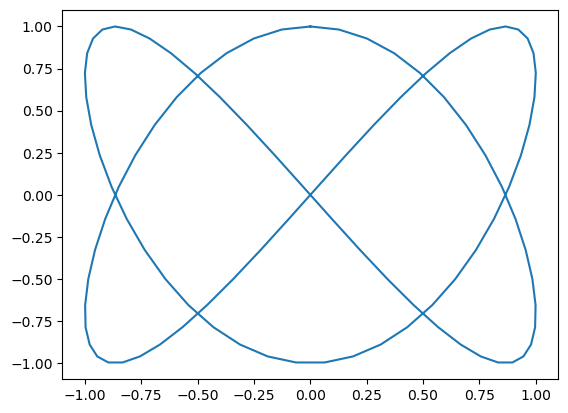

In [17]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
# plt.axes().set_aspect(1)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

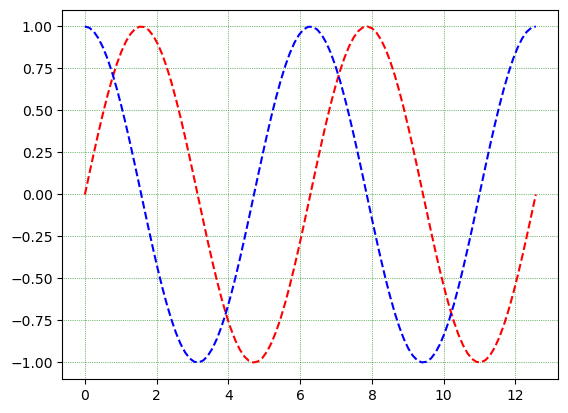

In [21]:
x = np.linspace(0, 4 * np.pi, 100)
plt.figure()
plt.grid(color='g',linestyle=':',linewidth=0.5)
plt.plot(x, np.sin(x), 'r--')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

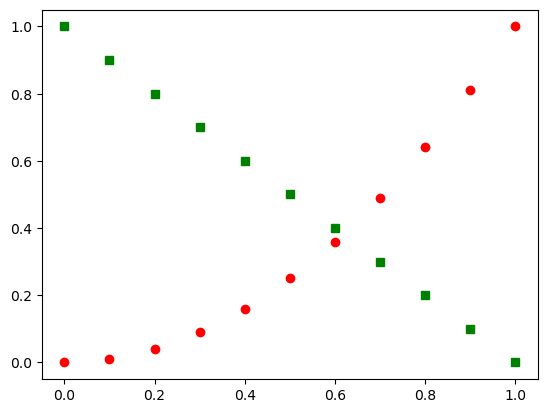

In [24]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Библиотека не ограничивается созданием только одним типом графика (line plot). Давайте рассмотрим примеры других типов:

Диаграмма разброса (scatter plot)

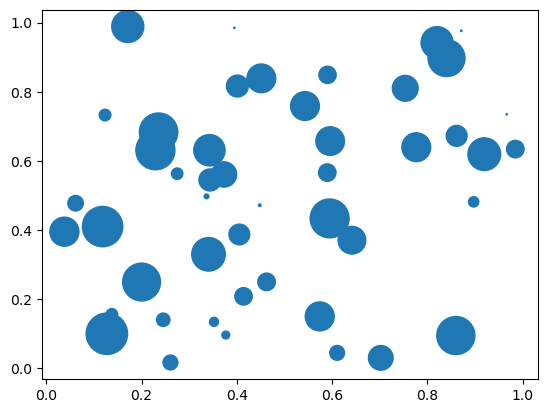

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123456)

# создадим 50 точек из нормального распределния
N = 50
# координаты х, у
x = np.random.rand(N)
y = np.random.rand(N)
# и их радиус
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# отобразим
plt.scatter(x, y, s=area)
plt.show()

Столбчатые диаграммы (bar chart)

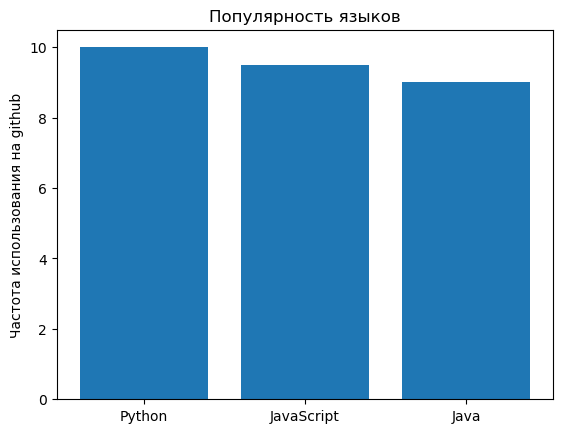

In [36]:
# задаем подписи отображаемых объектов
objects = ('Python', 'JavaScript', 'Java')
# задаем значения позиций подписей (по х)
y_pos = np.arange(len(objects))
# задаем значения (по y)
popularity = [10.,9.5,9]
# создаем столбчатую диаграмму с вышеобозначенными значениями
plt.bar(y_pos, popularity)
# задаем подписи по оси х
plt.xticks(y_pos, objects)
# задаем название по y
plt.ylabel('Частота использования на github')
# задаем название всего графика
plt.title('Популярность языков')

plt.show()

Гистограммы (histogram)

In [43]:
sigma*np.random.randn(10000)

array([ 1.0080714 ,  0.33434922, -1.98419039, ...,  2.1649603 ,
       -0.11057536,  5.04823571])

In [45]:
sigma*np.random.randn(10000) + mu

array([42.81960325, 43.52454209, 35.66443552, ..., 48.34801322,
       46.29044941, 42.40333207])

In [55]:
# среднее распределения
mu = 42
# среднекадратичное отклонение
sigma = 3.14
# значения, сгенерированные из нормального распределения
# подробнее о нормальном распределении - https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
x = mu + sigma * np.random.randn(10000)
# отобразим несколько элементов
print(x)

[39.24286116 42.23452774 41.12906144 ... 37.66218124 41.95784973
 39.62310665]


(array([  2.,   1.,   1.,   3.,   3.,   7.,  18.,  19.,  26.,  33.,  45.,
         68.,  74., 113., 145., 194., 230., 293., 329., 400., 449., 490.,
        572., 557., 591., 588., 609., 597., 535., 525., 436., 406., 349.,
        278., 234., 188., 165., 118., 104.,  65.,  43.,  30.,  29.,  19.,
          8.,   5.,   3.,   1.,   1.,   1.]),
 array([29.94376516, 30.41642576, 30.88908636, 31.36174696, 31.83440756,
        32.30706816, 32.77972876, 33.25238936, 33.72504996, 34.19771056,
        34.67037116, 35.14303176, 35.61569236, 36.08835296, 36.56101356,
        37.03367416, 37.50633476, 37.97899536, 38.45165596, 38.92431656,
        39.39697716, 39.86963776, 40.34229836, 40.81495896, 41.28761956,
        41.76028016, 42.23294076, 42.70560135, 43.17826195, 43.65092255,
        44.12358315, 44.59624375, 45.06890435, 45.54156495, 46.01422555,
        46.48688615, 46.95954675, 47.43220735, 47.90486795, 48.37752855,
        48.85018915, 49.32284975, 49.79551035, 50.26817095, 50.74083155,
 

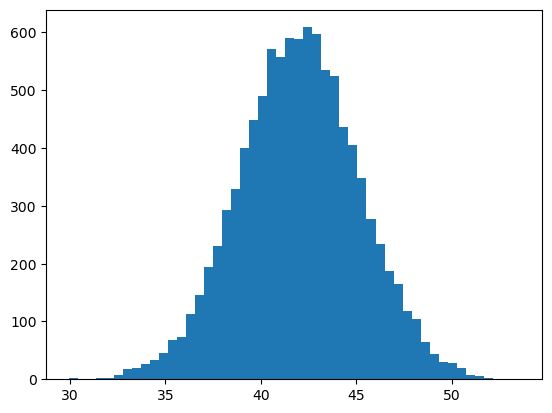

In [57]:
num_bins = 50
# Гистограмма переменной показывает распределение частоты этой переменной
# (высота столбца - сколько элеметов попало в диапазон этого столбца)
# В этом случае мы указали num_bins - количество столбцов заранее
plt.hist(x, num_bins)

(array([  10.,  103.,  445., 1446., 2659., 2854., 1703.,  640.,  129.,
          11.]),
 array([29.94376516, 32.30706816, 34.67037116, 37.03367416, 39.39697716,
        41.76028016, 44.12358315, 46.48688615, 48.85018915, 51.21349215,
        53.57679515]),
 <BarContainer object of 10 artists>)

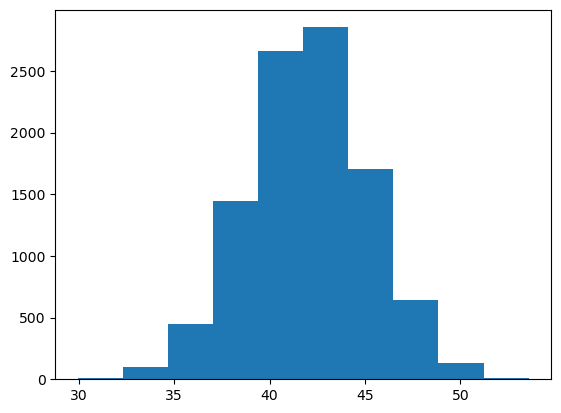

In [59]:
# а можем оставить это на усмотрение алгоритма
plt.hist(x)

Круговые диаграммы (pie chart)

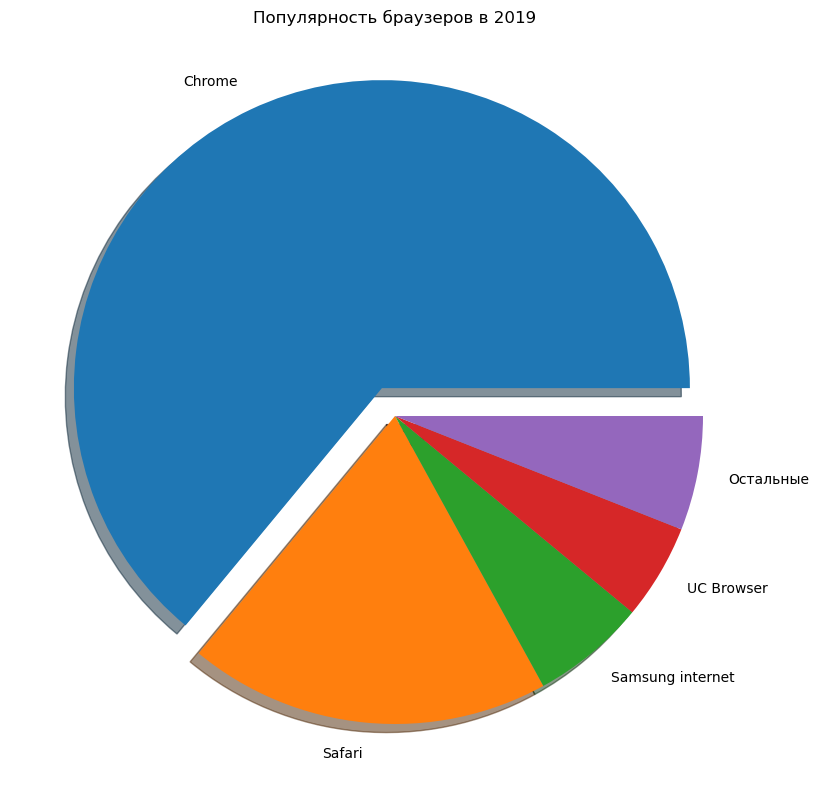

In [65]:

# определяем названия браузеров
labels = 'Chrome', 'Safari', 'Samsung internet', 'UC Browser', 'Остальные'
# определяем значения для соответсвующих подписей
sizes = [64, 19, 6, 5, 6]
# определяем насколько мы ходим выделить каждый
explode = (0.1, 0, 0, 0, 0)
# создаем объект подграфика и ось с данными и подписями
fig1, ax1 = plt.subplots(figsize=(10, 10))
# функции имеют много различных настроек, к примеру тени
ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
# задаем название всего графика
plt.title('Популярность браузеров в 2019')
# отображаем
plt.show()